In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-77517f48-7873-64b5-30e9-b0e52460bc5f)
GPU 1: Tesla T4 (UUID: GPU-0bf9ac83-9cb8-5f41-f37b-7bcadcf98712)


In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
# Displaying a text
train_data["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [7]:
# shuffling the train data
train_data_shuffled = train_data.sample(frac=1, random_state=42)
train_data_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# Checking the distribution of classes in train data
train_data_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
len(train_data_shuffled), len(test_data)

(7613, 3263)

In [10]:
random_index = random.randint(0,len(train_data)-5)

for row in train_data[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target=row
    print(f"Target: {target}","(real disaster)" if target>0 else "(Not real disaster)")
    print(f"Text: \n{text}")
    print("\n----------------\n")

Target: 0 (Not real disaster)
Text: 
there's this person &amp; they reckon when you're dying your brain floods with dmt causing you to relive your life in real time in a simulation

----------------

Target: 0 (Not real disaster)
Text: 
Have you ever remembered an old song something you haven't heared for years?  words that carry floods of memories all along. #priceless

----------------

Target: 0 (Not real disaster)
Text: 
Floods Fishing Finally Sunshine &amp; Fab Deals from Albertsons Anniversary Sale |Lauren Paints | a beautiful life http://t.co/CwHSLMB8x9

----------------

Target: 1 (real disaster)
Text: 
#flood #disaster Bengal floods: CM Mamata Banerjee blames DVC BJP claims state failed to use ... - Economic T... http://t.co/BOZlwr716Z

----------------

Target: 1 (real disaster)
Text: 
69 Dead Due to Floods in Myanmar: Naypyidaw Aug 5 (Prensa Latina) The death toll rose today to 69 in Myanmar... http://t.co/JoDs9a32PI

----------------



In [11]:
# Splitting the train data into training and validation sets
from sklearn.model_selection import train_test_split
train_sentences, valid_sentences, train_labels, valid_labels = train_test_split(train_data["text"].to_numpy(),
                                                                               train_data["target"].to_numpy(),
                                                                               test_size=0.1,
                                                                               random_state=42)

In [12]:
len(train_sentences), len(train_labels)

(6851, 6851)

In [13]:
len(valid_sentences), len(valid_labels)

(762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
        'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
        "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
        "I'm On Fire.  http://t.co/WATsmxYTVa",
        "More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78",
        'Why do u ruin everything?  @9tarbox u ruined the sour cream and u put a brick of cheese in the freezer..dummy',
        'http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes place in the #FaroeIslands every year?',
        "WACKOES like #MicheleBachman predict the WORLD will SOON be OBLITERATED by a burning firey INFERNO but can't accept #GlobalWarming!! HELLO!!",
        '@Reuters people like you should be charged after the inevitable rioting for contributing to

In [15]:
valid_sentences[:10], valid_labels[:10]

(array(['So you have a new weapon that can cause un-imaginable destruction.',
        'The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@',
        'DT @georgegalloway: RT @Galloway4Mayor: \x89ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q',
        'Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.',
        'in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3',
        '@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time',
        'my favorite lady came to our volunteer meeting\nhopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS',
        '@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS',
       

In [16]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=None,
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace",
                                   ngrams=None,
                                   output_mode='int',
                                   output_sequence_length=None)
#                                    pad_to_max_tokens=True)

In [17]:
train_sentences[0].split()

["'McFadden",
 'Reportedly',
 'to',
 'Test',
 'Hamstring',
 "Thursday'",
 'via',
 '@TeamStream',
 'http://t.co/jWq4KvJH2j']

In [18]:
# finding the total number of words/tokens present in the training sentences
sum=0
for i in train_sentences:
    sum+=len(i.split())
print(f"Total number of tokens present in the training sentences: {sum}")

Total number of tokens present in the training sentences: 101905


In [19]:
# finding the average number of words/token
avg = round(sum/len(train_sentences))
print(f"Average number of tokens present in the training sentences: {avg}")

Average number of tokens present in the training sentences: 15


In [20]:
max_vocab_length = 10000 #max number of words in our vocabulary
max_length = 15 #max length our sequence will be (how many words from a tweet our model will see)

# setting up the text vectorization again
text_vectorizer = TextVectorization (max_tokens=max_vocab_length,
                                       output_mode="int",
                                       output_sequence_length=max_length)

In [21]:
# fitting the text vectorizer to the training data
text_vectorizer.adapt(train_sentences)

In [22]:
# finding the common words from the vocabulary of train_sentences
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Total number of words in the vocabulary : {len(words_in_vocab)}")
print(f"5 most common words : {top_5_words}")
print(f"5 least common words : {bottom_5_words}")


Total number of words in the vocabulary : 10000
5 most common words : ['', '[UNK]', 'the', 'a', 'in']
5 least common words : ['pakthey', 'pakistan\x89Ûªs', 'pakistans', 'pajamas', 'paints']


In [23]:
sample_sentence = "There is a high chance of tsunami in this region"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  75,    9,    3,  343,  777,    6,  477,    4,   19, 1366,    0,
           0,    0,    0,    0]])>

In [24]:
sample_sentence_2 = "There's a flood in my street!"
text_vectorizer([sample_sentence_2])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[282,   3, 206,   4,  13, 674,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
random_sentence = random.choice(train_sentences)
print(f"Original sentece : \n{random_sentence}")

print(f"\nVectorized sentence : \n{text_vectorizer([random_sentence])}")

Original sentece : 
@ThatRussianMan you're too busy finishing those weapon designs

Vectorized sentence : 
[[7652  182  138 5998 3851  168  268 3056    0    0    0    0    0    0
     0]]


In [26]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = max_vocab_length,
                      input_length = max_length,
                      embeddings_initializer="uniform",
                     output_dim = 128,
                     )
embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f"Original sentece : \n{random_sentence}")

vectorized_sentence = text_vectorizer([random_sentence])
embedded_sentence = embedding(vectorized_sentence)

print("\n Embedded sentence :")
embedded_sentence

Original sentece : 
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/akNyNPv461

 Embedded sentence :


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02641188,  0.03529679, -0.01530874, ...,  0.02144972,
         -0.01465375, -0.01830543],
        [-0.00775389, -0.00733137,  0.02920126, ...,  0.00737245,
         -0.03139013, -0.00175999],
        [-0.03234199, -0.00956272,  0.03552301, ...,  0.00524437,
          0.04403757, -0.01860889],
        ...,
        [-0.00099195,  0.03987196, -0.033208  , ...,  0.04279077,
         -0.04708705,  0.00501942],
        [-0.01812102,  0.0016697 , -0.02954819, ..., -0.04508538,
         -0.00897907,  0.00877297],
        [-0.00243538, -0.01872685, -0.02727732, ...,  0.00435004,
          0.03602013,  0.03273508]]], dtype=float32)>

## Model 0 - Naive bayes with Tf-idf

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model_0_score = model_0.score(valid_sentences,valid_labels)
print(f"Accuracy of model 0 : {model_0_score*100:.2f}%")

Accuracy of model 0 : 77.82%


In [30]:
model_0_preds = model_0.predict(valid_sentences)
model_0_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [31]:
valid_labels[:20]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, recall_score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    results = {
        "Accuracy" : accuracy*100,
        "Precision" : precision*100,
        "Recall" : recall*100,
        "F1" : f1*100
    }    
    return results
    

In [33]:
model_0_results = evaluate_model(valid_labels, model_0_preds)
model_0_results

{'Accuracy': 77.82152230971128,
 'Precision': 85.53191489361703,
 'Recall': 59.82142857142857,
 'F1': 70.40280210157619}

## Model 1 - Simple dense model

In [34]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x= layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [36]:
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [37]:
history_model_1 = model_1.fit(train_sentences,
           train_labels,
           epochs=5,
           validation_data=(valid_sentences,valid_labels),
            )

Epoch 1/5
215/215 [==============================] - 19s 65ms/step - loss: 0.6106 - accuracy: 0.6989 - val_loss: 0.5398 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4404 - accuracy: 0.8231 - val_loss: 0.4844 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3456 - accuracy: 0.8621 - val_loss: 0.4761 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2828 - accuracy: 0.8907 - val_loss: 0.4865 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2355 - accuracy: 0.9146 - val_loss: 0.5064 - val_accuracy: 0.7887


<Axes: >

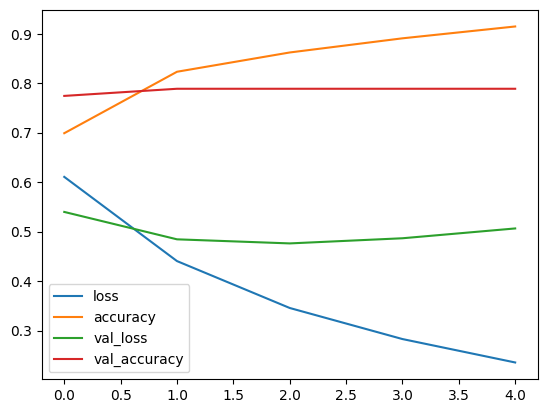

In [38]:
pd.DataFrame(history_model_1.history).plot()

In [39]:
model_1.evaluate(valid_sentences, valid_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7887


[0.5063666701316833, 0.7887139320373535]

In [40]:
model_1_probs = model_1.predict(valid_sentences)

24/24 [==============================] - 0s 2ms/step


In [41]:
model_1_probs.shape

(762, 1)

In [42]:
model_1_probs[0]

array([0.03205197], dtype=float32)

In [43]:
model_1_probs[:10]

array([[0.03205197],
       [0.17796467],
       [0.36865476],
       [0.02347887],
       [0.6418813 ],
       [0.176719  ],
       [0.02297769],
       [0.26786813],
       [0.13002788],
       [0.9088745 ]], dtype=float32)

In [44]:
model_1_probs = tf.squeeze(tf.round(model_1_probs))
model_1_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [45]:
model_1_results = evaluate_model(valid_labels, model_1_probs)
model_1_results

{'Accuracy': 78.87139107611549,
 'Precision': 79.46127946127946,
 'Recall': 70.23809523809523,
 'F1': 74.565560821485}

In [46]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Getting the weights from the embedding layer
embedded_weights = model_1.get_layer("embedding").get_weights()[0]
embedded_weights

array([[ 0.01699936, -0.0017613 , -0.01041126, ..., -0.01315429,
         0.0191528 ,  0.01530644],
       [-0.01481903,  0.00333962, -0.02881628, ..., -0.04634703,
        -0.01125319,  0.00586546],
       [ 0.00055648, -0.02114777, -0.00476819, ...,  0.00097055,
        -0.01965474,  0.03364933],
       ...,
       [-0.09349848, -0.03635272, -0.10457567, ...,  0.05063123,
         0.10316106,  0.07499693],
       [ 0.03090558,  0.03239138, -0.04917775, ..., -0.03740128,
        -0.04773096,  0.01225852],
       [ 0.02650923, -0.00395765, -0.01965135, ...,  0.02465319,
         0.03606938,  0.01870013]], dtype=float32)

In [49]:
embedded_weights.shape # every token (10000 tokens) is embedded into 128 vector

(10000, 128)

In [50]:
# saving the weights
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embedded_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

## Model 2 - LSTM

In [51]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu") (x)
outputs = layers.Dense(1,activation="sigmoid") (x)

model_2 = tf.keras.Model(inputs,outputs)

In [52]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                             

In [53]:
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [54]:
model_2_history = model_2.fit(train_sentences, train_labels,
           epochs=5,
            validation_data=(valid_sentences, valid_labels),
           )

Epoch 1/5
215/215 [==============================] - 13s 45ms/step - loss: 0.2225 - accuracy: 0.9216 - val_loss: 0.6356 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1530 - accuracy: 0.9419 - val_loss: 0.6589 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1234 - accuracy: 0.9539 - val_loss: 0.8483 - val_accuracy: 0.7480
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1019 - accuracy: 0.9615 - val_loss: 0.7668 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0785 - accuracy: 0.9672 - val_loss: 1.0314 - val_accuracy: 0.7520


<Axes: >

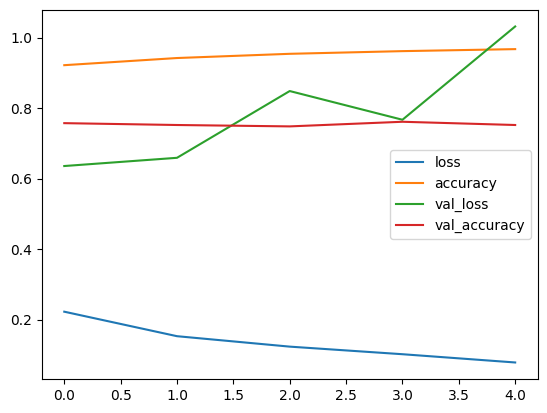

In [55]:
pd.DataFrame(model_2_history.history).plot()

In [56]:
model_2.evaluate(valid_sentences, valid_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.0314 - accuracy: 0.7520


[1.0313880443572998, 0.751968502998352]

In [57]:
model_2_probs = model_2.predict(valid_sentences)
model_2_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[2.2531140e-03],
       [2.6309786e-02],
       [2.1249419e-03],
       [1.6133153e-04],
       [9.9923944e-01],
       [5.9874389e-02],
       [1.2571336e-04],
       [3.4143377e-02],
       [7.5176336e-02],
       [9.9997473e-01]], dtype=float32)

In [58]:
model_2_probs = tf.squeeze(tf.round(model_2_probs))
model_2_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [59]:
model_2_results = evaluate_model(valid_labels, model_2_probs)
model_2_results

{'Accuracy': 75.19685039370079,
 'Precision': 73.63344051446946,
 'Recall': 68.15476190476191,
 'F1': 70.78825347758887}

## Model 3 - Gated Recurrent Unit (GRU)

In [60]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [61]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                       

In [62]:
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [63]:
history_model_3 = model_3.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(valid_sentences,valid_labels))
                                

Epoch 1/5
215/215 [==============================] - 13s 50ms/step - loss: 0.1415 - accuracy: 0.9486 - val_loss: 0.7983 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0819 - accuracy: 0.9692 - val_loss: 0.9336 - val_accuracy: 0.7454
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0682 - accuracy: 0.9743 - val_loss: 1.3775 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0616 - accuracy: 0.9758 - val_loss: 1.0870 - val_accuracy: 0.7402
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0516 - accuracy: 0.9785 - val_loss: 1.3225 - val_accuracy: 0.7533


<Axes: >

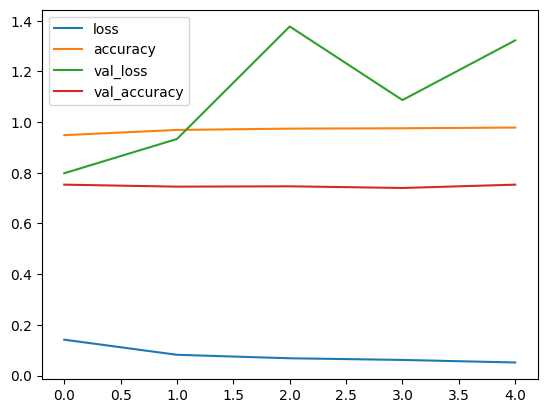

In [64]:
pd.DataFrame(history_model_3.history).plot()

In [65]:
model_3_probs = model_3.predict(valid_sentences)

24/24 [==============================] - 0s 3ms/step


In [66]:
model_3_probs[:10]

array([[1.3316949e-03],
       [1.1764353e-02],
       [2.0861020e-04],
       [3.3228484e-05],
       [9.9183452e-01],
       [3.0965550e-02],
       [4.0721716e-05],
       [2.3709778e-03],
       [2.0932980e-02],
       [9.9998760e-01]], dtype=float32)

In [67]:
model_3_probs = tf.squeeze(tf.round(model_3_probs))
model_3_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [68]:
model_3_results = evaluate_model(valid_labels,model_3_probs)
model_3_results

{'Accuracy': 75.32808398950131,
 'Precision': 75.87412587412588,
 'Recall': 64.58333333333334,
 'F1': 69.7749196141479}

## Model 4 - Bidirectional RNN 

In [69]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [70]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)       

In [71]:
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [72]:
history_model_4 = model_4.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(valid_sentences,valid_labels))
                             

Epoch 1/5
215/215 [==============================] - 15s 51ms/step - loss: 0.0982 - accuracy: 0.9689 - val_loss: 1.0833 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0488 - accuracy: 0.9787 - val_loss: 1.7571 - val_accuracy: 0.7428
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0425 - accuracy: 0.9791 - val_loss: 1.5736 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0400 - accuracy: 0.9799 - val_loss: 1.4863 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0380 - accuracy: 0.9790 - val_loss: 1.8807 - val_accuracy: 0.7467


<Axes: >

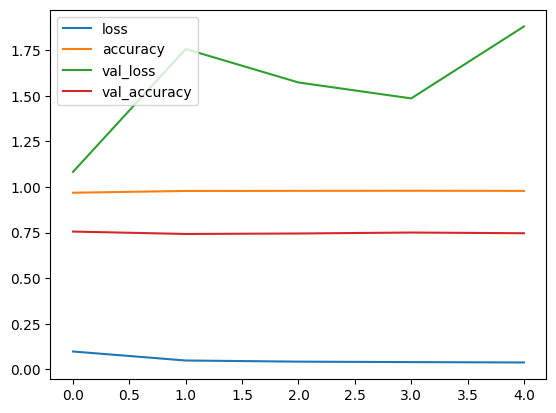

In [73]:
pd.DataFrame(history_model_4.history).plot()

In [74]:
model_4_probs = model_4.predict(valid_sentences)

24/24 [==============================] - 1s 3ms/step


In [75]:
model_4_probs = tf.squeeze(tf.round(model_4_probs))

In [76]:
model_4_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [77]:
model_4_results = evaluate_model(valid_labels,model_4_probs)
model_4_results

{'Accuracy': 74.67191601049869,
 'Precision': 71.47147147147147,
 'Recall': 70.83333333333334,
 'F1': 71.15097159940208}

## Model 5 - Conv1D

In [78]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["This is just to test embedding and tokenization."]))
conv1D = layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation="relu",
                      padding="same")


In [79]:
conv1d_output = conv1D(embedding_test)
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv1d_output) #get the most important feature

In [80]:
embedding_test.shape, conv1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [81]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,padding="same",activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs,outputs)

In [82]:
model_5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_7 (Dense)             (None, 1)                 65  

In [83]:
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_model_5 = model_5.fit(train_sentences,train_labels,
                             epochs=5,
                             validation_data=(valid_sentences,valid_labels))

Epoch 1/5
215/215 [==============================] - 13s 49ms/step - loss: 0.1107 - accuracy: 0.9650 - val_loss: 1.0723 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0656 - accuracy: 0.9766 - val_loss: 1.1838 - val_accuracy: 0.7297
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0566 - accuracy: 0.9778 - val_loss: 1.2899 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0518 - accuracy: 0.9794 - val_loss: 1.3883 - val_accuracy: 0.7388
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 1.3611 - val_accuracy: 0.7428


<Axes: >

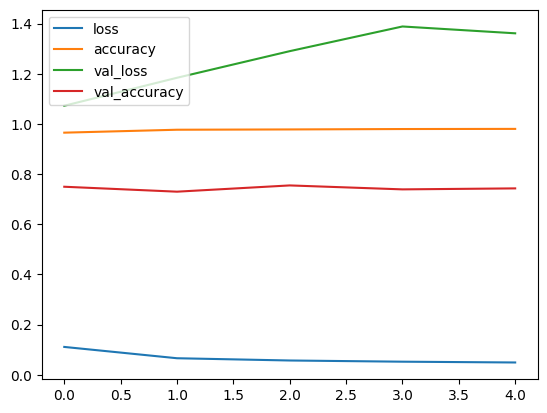

In [84]:
pd.DataFrame(history_model_5.history).plot()

In [85]:
model_5_probs = model_5.predict(valid_sentences)

24/24 [==============================] - 0s 2ms/step


In [86]:
model_5_probs = tf.squeeze(tf.round(model_5_probs))
model_5_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)>

In [87]:
model_5_results = evaluate_model(valid_labels,model_5_probs)
model_5_results

{'Accuracy': 74.2782152230971,
 'Precision': 71.08433734939759,
 'Recall': 70.23809523809523,
 'F1': 70.65868263473052}

## Model 6 - Universal Sentence Encoder

In [88]:
import tensorflow_hub as hub
embedding = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

In [89]:
embed_samples = embedding(["This is an example sentence to test out the embedding layer imported from the tensorflow hub"])
embed_samples[:5]

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.02829445,  0.02839016, -0.06139125, -0.08664701, -0.07835435,
        -0.00312797, -0.03842211,  0.0529387 ,  0.04506368,  0.08435874,
        -0.04277268,  0.02244353,  0.01775696,  0.08457192, -0.05600252,
         0.0900342 ,  0.04157554, -0.06545937,  0.00046574,  0.00827854,
        -0.00561675, -0.02225173, -0.02272941,  0.05998465, -0.01572226,
         0.0689192 ,  0.0104438 , -0.04785712,  0.01438042,  0.02992679,
         0.01104252, -0.06284782,  0.04795174,  0.01903364, -0.07268404,
         0.01609311, -0.02893427,  0.02783434, -0.04323035, -0.0127744 ,
         0.03218506,  0.07043576,  0.01397823,  0.04663932,  0.07563019,
         0.04642788, -0.01682546, -0.06149152,  0.03424232,  0.03629737,
        -0.07111284, -0.03436111,  0.04912413, -0.02210974, -0.01995056,
        -0.06206847, -0.00120658,  0.04547939, -0.01014295,  0.00521699,
        -0.02713816, -0.00756734, -0.01009741,  0.03327626, -0.01381559,
 

In [90]:
# Creating a keras layer for the sentence encoder
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                       input_shape=[],
                                       trainable=False,
                                       dtype="string",
                                       name="USE")

In [91]:
#  Creating the model using the sequential api
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [92]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [93]:
history_model_6 = model_6.fit(train_sentences,train_labels,
                             epochs=5,
                             validation_data=(valid_sentences,valid_labels),
                             )

Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.5004 - accuracy: 0.7825 - val_loss: 0.4231 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4164 - accuracy: 0.8151 - val_loss: 0.4054 - val_accuracy: 0.8176
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4017 - accuracy: 0.8231 - val_loss: 0.4005 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3939 - accuracy: 0.8254 - val_loss: 0.4001 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3869 - accuracy: 0.8326 - val_loss: 0.3992 - val_accuracy: 0.8241


<Axes: >

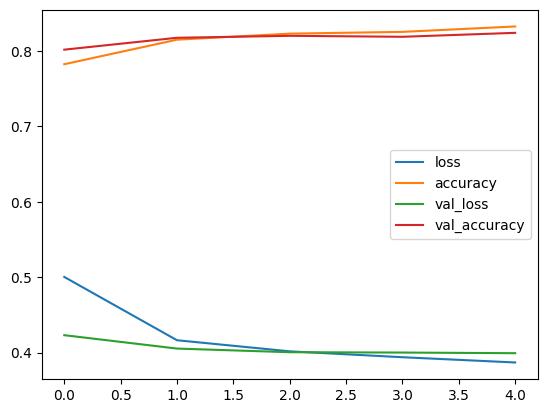

In [94]:
pd.DataFrame(history_model_6.history).plot()

In [95]:
model_6_probs = model_6.predict(valid_sentences)

24/24 [==============================] - 1s 8ms/step


In [96]:
model_6_probs = tf.squeeze(tf.round(model_6_probs))
model_6_probs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [97]:
model_6_results = evaluate_model(valid_labels,model_6_probs)
model_6_results

{'Accuracy': 82.41469816272966,
 'Precision': 82.58064516129032,
 'Recall': 76.19047619047619,
 'F1': 79.25696594427245}

## Model 7 - USE with 10% of data

In [98]:
train_data_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [99]:
train_data_10_percent = train_data_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
len(train_data_10_percent)

761

In [100]:
train_sentences_10_percent = train_data_10_percent["text"].to_list()
train_sentences_10_percent[:5]

['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
 'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
 'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
 '@camilacabello97 Internally and externally screaming',
 'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov']

In [101]:
train_labels_10_percent = train_data_10_percent["target"].to_list()
train_labels_10_percent[:5]

[0, 0, 1, 1, 1]

In [102]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [103]:
# checking the distribution of the classes in 10 percent of data
train_data_10_percent["target"].value_counts()

target
0    413
1    348
Name: count, dtype: int64

In [104]:
# checking the distribution of the classes in 100 percent of data
train_data_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [105]:
# Building the model similar to the previous model (model 6) and fitting it on the 10% of data

sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                       trainable=False,
                                        input_shape=[],
                                        dtype="string",
                                        name="USE")

In [106]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7")

In [107]:
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [108]:
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [109]:
history_model_7 = model_7.fit(train_sentences_10_percent,
                             train_labels_10_percent,
                             epochs=5,
                             validation_data=(valid_sentences,valid_labels),
                             )

Epoch 1/5
24/24 [==============================] - 4s 41ms/step - loss: 0.6680 - accuracy: 0.6978 - val_loss: 0.6369 - val_accuracy: 0.7848
Epoch 2/5
24/24 [==============================] - 0s 20ms/step - loss: 0.5944 - accuracy: 0.7911 - val_loss: 0.5660 - val_accuracy: 0.7966
Epoch 3/5
24/24 [==============================] - 0s 19ms/step - loss: 0.5184 - accuracy: 0.8068 - val_loss: 0.5104 - val_accuracy: 0.7966
Epoch 4/5
24/24 [==============================] - 0s 20ms/step - loss: 0.4650 - accuracy: 0.8003 - val_loss: 0.4806 - val_accuracy: 0.7874
Epoch 5/5
24/24 [==============================] - 0s 19ms/step - loss: 0.4284 - accuracy: 0.8173 - val_loss: 0.4631 - val_accuracy: 0.7874


<Axes: >

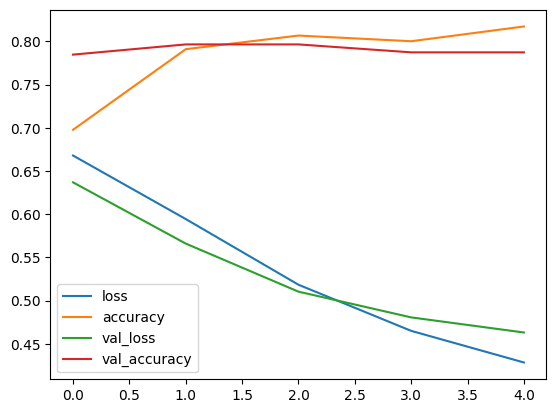

In [110]:
pd.DataFrame(history_model_7.history).plot()

In [111]:
model_7_probs = tf.squeeze(tf.round(model_7.predict(valid_sentences)))
model_7_probs[:5]

24/24 [==============================] - 1s 8ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

In [112]:
model_7_results = evaluate_model(valid_labels,model_7_probs)
model_7_results

{'Accuracy': 78.74015748031496,
 'Precision': 76.52439024390245,
 'Recall': 74.70238095238095,
 'F1': 75.6024096385542}

In [113]:
model_6_results

{'Accuracy': 82.41469816272966,
 'Precision': 82.58064516129032,
 'Recall': 76.19047619047619,
 'F1': 79.25696594427245}

**The above method of creating 10 percent of data leads to data leakage. As some of the samples present in the validation data might be present in the train data.** 

**Initially, train data and validation data was created from the whole data. And hence when we created the 10 percent training data from this whole data, it would have some common samples between the 10 percent train data and the validation data that was created before.**

**Data leakage can sometimes lead to our model performing better even on less data as compared to model trained on more data, which is quite unusual**

**Hence, to avoid this problem of data leakage, it's better to create 10 percent of train sentences and 10 percent of train labels from the original train sentences and train labels.**



In [114]:
len(train_sentences)

6851

In [115]:
0.1*len(train_sentences)

685.1

In [116]:
train_sentences_10_percent = train_sentences[:685]
train_sentences_10_percent[:5]

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
       "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
       "I'm On Fire.  http://t.co/WATsmxYTVa",
       "More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78"],
      dtype=object)

In [117]:
len(train_sentences_10_percent)

685

In [118]:
len(train_labels)

6851

In [119]:
0.1*(len(train_labels))

685.1

In [120]:
train_labels_10_percent = train_labels[:685]
train_labels_10_percent[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [121]:
len(train_labels_10_percent)

685

In [122]:
# checking the distribution of classes in the newly created 10 percent of data
pd.Series(train_labels_10_percent).value_counts()

0    404
1    281
Name: count, dtype: int64

In [123]:
model_7_corrected = tf.keras.models.clone_model(model_7)

In [124]:
model_7_corrected.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [125]:
model_7_corrected.compile(loss="binary_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['accuracy'])

In [126]:
history_model_7_corrected = model_7_corrected.fit(train_sentences_10_percent,
                                                 train_labels_10_percent,
                                                 epochs=5,
                                                 validation_data=(valid_sentences,valid_labels),
                                                 )

Epoch 1/5
22/22 [==============================] - 4s 41ms/step - loss: 0.6752 - accuracy: 0.6015 - val_loss: 0.6474 - val_accuracy: 0.7572
Epoch 2/5
22/22 [==============================] - 0s 20ms/step - loss: 0.6027 - accuracy: 0.8146 - val_loss: 0.5881 - val_accuracy: 0.7585
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5284 - accuracy: 0.8190 - val_loss: 0.5335 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4664 - accuracy: 0.8307 - val_loss: 0.4995 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4220 - accuracy: 0.8409 - val_loss: 0.4778 - val_accuracy: 0.7808


<Axes: >

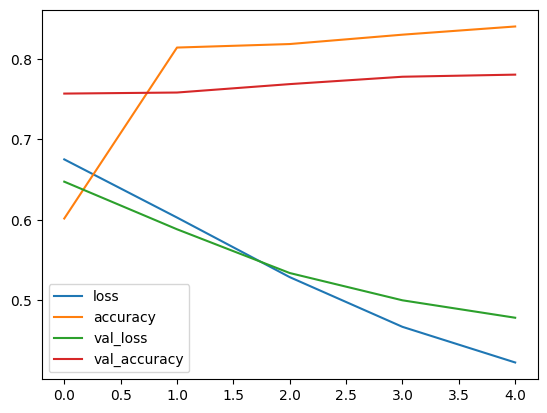

In [127]:
pd.DataFrame(history_model_7_corrected.history).plot()

In [128]:
model_7_corrected_probs = tf.squeeze(tf.round(model_7_corrected.predict(valid_sentences)))

24/24 [==============================] - 1s 8ms/step


In [129]:
model_7_corrected_results = evaluate_model(valid_labels,model_7_corrected_probs)
model_7_corrected_results

{'Accuracy': 78.08398950131233,
 'Precision': 76.99680511182109,
 'Recall': 71.72619047619048,
 'F1': 74.26810477657936}

## Comparing the results of all the models created

In [130]:
all_model_results = pd.DataFrame({"0_Baseline":model_0_results,
                                 "1_simple_dense":model_1_results,
                                 "2_lstm":model_2_results,
                                 "3_gru":model_3_results,
                                 "4_bidirectional":model_4_results,
                                 "5_conv1d":model_5_results,
                                 "6_use":model_6_results,
                                 "7_use_10_percent":model_7_results})
all_model_results

,0_Baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1d,6_use,7_use_10_percent
Accuracy,77.821522,78.871391,75.196850,75.328084,74.671916,74.278215,82.414698,78.740157
Precision,85.531915,79.461279,73.633441,75.874126,71.471471,71.084337,82.580645,76.524390
Recall,59.821429,70.238095,68.154762,64.583333,70.833333,70.238095,76.190476,74.702381
F1,70.402802,74.565561,70.788253,69.774920,71.150972,70.658683,79.256966,75.602410


In [131]:
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1
0_Baseline,77.821522,85.531915,59.821429,70.402802
1_simple_dense,78.871391,79.461279,70.238095,74.565561
2_lstm,75.196850,73.633441,68.154762,70.788253
3_gru,75.328084,75.874126,64.583333,69.774920
4_bidirectional,74.671916,71.471471,70.833333,71.150972
5_conv1d,74.278215,71.084337,70.238095,70.658683
6_use,82.414698,82.580645,76.190476,79.256966
7_use_10_percent,78.740157,76.524390,74.702381,75.602410


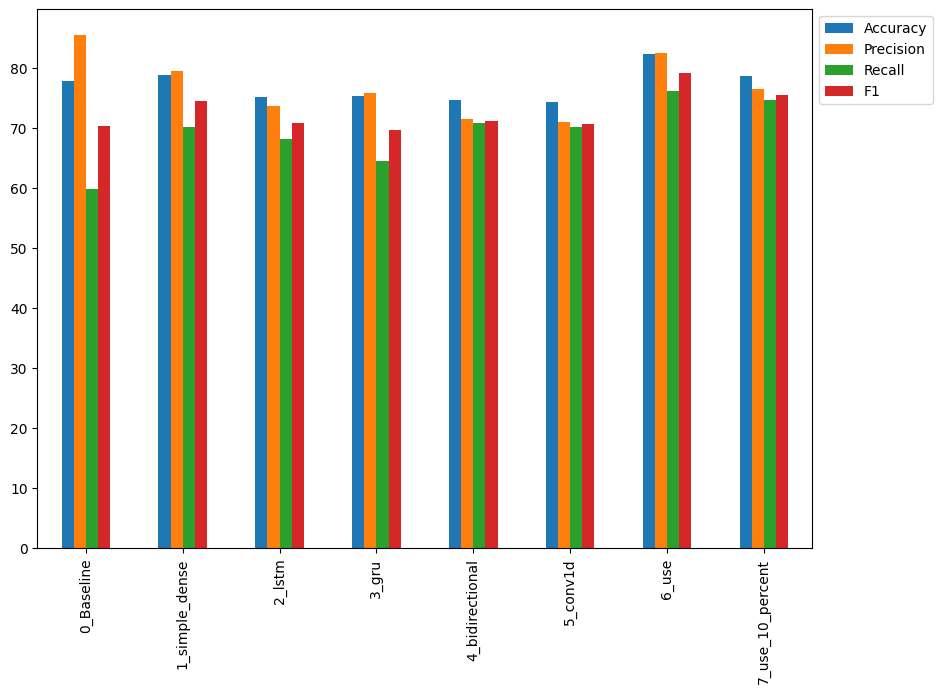

In [132]:
all_model_results.plot(kind="bar",figsize=(10,7))
plt.legend(bbox_to_anchor=(1.0,1.0));

<Axes: >

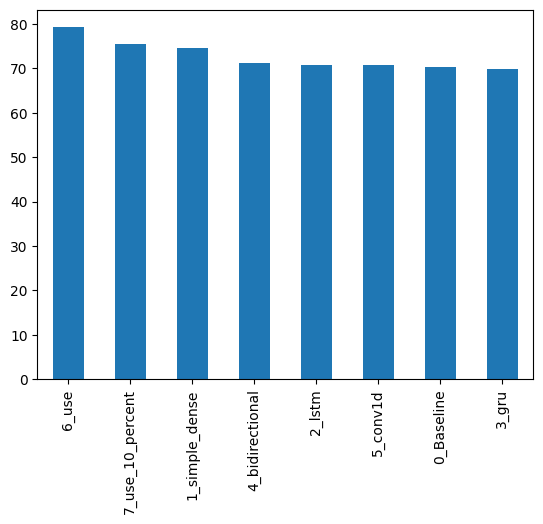

In [133]:
# Sorting the models according to their f1 scores and plotting the results
all_model_results.sort_values(by="F1",ascending=False)["F1"].plot(kind="bar")

## Saving the best model

In [134]:
model_6_results

{'Accuracy': 82.41469816272966,
 'Precision': 82.58064516129032,
 'Recall': 76.19047619047619,
 'F1': 79.25696594427245}

In [135]:
model_6.save("model_6.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [136]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                           custom_objects={"KerasLayer":hub.KerasLayer})

In [137]:
loaded_model_6.evaluate(valid_sentences,valid_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.3992 - accuracy: 0.8241


[0.39923611283302307, 0.8241469860076904]

In [138]:
# Another way of saving the model using savedModel format
model_6.save("model_6_SavedModel")

In [139]:
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel")

In [140]:
loaded_model_6_SavedModel.evaluate(valid_sentences,valid_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.3992 - accuracy: 0.8241


[0.39923611283302307, 0.8241469860076904]

## Finding the most wrong predictions

In [141]:
# Making predictions with the loaded model
model_6_pred_prob = loaded_model_6_SavedModel.predict(valid_sentences)

24/24 [==============================] - 1s 8ms/step


In [142]:
model_6_pred_prob[:10]

array([[0.10277241],
       [0.07872664],
       [0.45813742],
       [0.19343849],
       [0.24605143],
       [0.09972079],
       [0.13225745],
       [0.08516558],
       [0.42794466],
       [0.8215162 ]], dtype=float32)

In [143]:
model_6_pred_prob = tf.squeeze(model_6_pred_prob)
model_6_pred_prob[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.10277241, 0.07872664, 0.45813742, 0.19343849, 0.24605143,
       0.09972079, 0.13225745, 0.08516558, 0.42794466, 0.8215162 ],
      dtype=float32)>

In [144]:
model_6_pred = tf.round(model_6_pred_prob)
model_6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [145]:
valid_df = pd.DataFrame({"text":valid_sentences,
                        "target":valid_labels,
                        "pred":model_6_pred,
                        "prob":model_6_pred_prob})

In [146]:
valid_df.head()

,text,target,pred,prob
0,So you have a new weapon that can cause un-ima...,1,0.0,0.102772
1,The f$&amp;@ing things I do for #GISHWHES Just...,0,0.0,0.078727
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,0.0,0.458137
3,Aftershock back to school kick off was great. ...,0,0.0,0.193438
4,in response to trauma Children of Addicts deve...,0,0.0,0.246051


In [147]:
most_wrong = valid_df[valid_df["target"]!=valid_df["pred"]].sort_values("prob",ascending=False)
most_wrong

,text,target,pred,prob
656,Russian customs destroyed a total of 319 tons ...,0,1.0,0.968021
608,USW: 'The damage from abandoning the deal coul...,0,1.0,0.943017
158,Over half of poll respondents worry nuclear di...,0,1.0,0.941802
688,Upheaval high note for bush opera http://t.co/...,0,1.0,0.921423
428,HereÛªs how media in Pakistan covered the cap...,0,1.0,0.915906
...,...,...,...,...
345,burned 129 calories doing 24 minutes of Walkin...,1,0.0,0.074673
593,all that panicking made me tired ;__; i want t...,1,0.0,0.073940
599,Reddit's new content policy goes into effect m...,1,0.0,0.067667
187,Even if u have your weapon and your badge we g...,1,0.0,0.062828


## Making predictions on the test dataset

In [148]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [149]:
test_sentences = test_data["text"].to_numpy()
test_sentences[:10]

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       'Apocalypse lighting. #Spokane #wildfires',
       'Typhoon Soudelor kills 28 in China and Taiwan',
       "We're shaking...It's an earthquake",
       "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
       'Hey! How are you?', 'What a nice hat?', 'Fuck off!'], dtype=object)

In [150]:
model_6_test_pred_prob = loaded_model_6_SavedModel.predict(test_sentences)

102/102 [==============================] - 1s 9ms/step


In [151]:
model_6_test_pred_prob = tf.squeeze(model_6_test_pred_prob)
model_6_test_pred_prob[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.75482404, 0.9149759 , 0.88165396, 0.9312004 , 0.9761875 ,
       0.63215303, 0.08478297, 0.06464893, 0.08114555, 0.06356675],
      dtype=float32)>

In [152]:
model_6_test_pred = tf.round(model_6_test_pred_prob)
model_6_test_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [153]:
test_df = pd.DataFrame({"text":test_sentences,
                       "pred":model_6_test_pred,
                       "prob":model_6_test_pred_prob})

In [154]:
test_df.head()

,text,pred,prob
0,Just happened a terrible car crash,1.0,0.754824
1,"Heard about #earthquake is different cities, s...",1.0,0.914976
2,"there is a forest fire at spot pond, geese are...",1.0,0.881654
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.931200
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.976188


In [155]:
# Displaying any random 10 sentences from the test_sentences along with the model's predictions
for i in range(10):
    random_index = random.randint(0,len(test_df))
    text = test_df["text"][random_index]
    pred = test_df["pred"][random_index]
    prob = test_df["prob"][random_index]
    print(f"Text:\n{text}")
    print(f"Prediction: {pred}")
    print(f"Prediction probability: {prob:.4f}")
    print("\n-----------------------------------\n")

Text:
@whatupdave Headline in 2075 'Dust Storm on Mars Destroys 1% of Money Supply'
Prediction: 1.0
Prediction probability: 0.6678

-----------------------------------

Text:
Please donate and spread the word! A training accident left the pole-vaulter Kira GrÌ_nberg a paraplegic http://t.co/6MpnyCl8PK
Prediction: 0.0
Prediction probability: 0.2055

-----------------------------------

Text:
[Chaos dancing in the streets | Why did God order obliteration of ancient Canaanites?] http://t.co/P7DLX1wFmC via @Michael_0000
Prediction: 0.0
Prediction probability: 0.1860

-----------------------------------

Text:
The Desolate Hope: Part 1: I LOVE THIS GAME: http://t.co/gPrRZdpE4v via @YouTube
Prediction: 0.0
Prediction probability: 0.0685

-----------------------------------

Text:
#3: Car Recorder ZeroEdgeå¨ Dual-lens Car Camera Vehicle Traffic/Driving History/Accident Camcorder  Large Re... http://t.co/kKFaSJv6Cj
Prediction: 0.0
Prediction probability: 0.3800

-------------------------------

## Making predictions on random tweets 

In [156]:
disaster_tweets = [
    "Earthquake just hit, everything shaking, scared to go outside!",
    "Wildfires spreading rapidly, the sky is filled with smoke #emergency",
    "Floodwaters rising, need immediate evacuation #help",
    "Massive hurricane approaching, stock up on supplies and stay safe!",
    "Tornado sirens blaring, seeking shelter ASAP!",
    "Train derailment downtown, chaos and confusion everywhere.",
    "Gas explosion reported in the neighborhood, sirens wailing #emergency",
    "Building collapsed in the city, emergency services rushing in.",
    "Chemical spill reported, hazmat teams on the way #danger",
    "Power outage across the area, hope it's restored soon #needhelp"
]

non_disaster_tweets = [
    "Lovely weather today, perfect for a picnic in the park! #sunshine",
    "Excited for the weekend, planning a movie marathon with friends.",
    "New restaurant opening in town, can't wait to try their menu!",
    "Just finished a great workout, feeling energized and motivated #fitness",
    "Attending a concert tonight, hoping for an amazing show #musiclover",
    "Received a promotion at work, hard work pays off #career",
    "Cooking dinner with family, enjoying quality time together.",
    "Learning a new language, it's challenging but rewarding #languagelearning",
    "Booked tickets for a vacation, counting down the days #travelbug",
    "Trying out a new hobby, painting brings such calmness #arttherapy"
]



In [157]:
real_tweets = disaster_tweets + non_disaster_tweets
random.shuffle(real_tweets)
print(real_tweets)

["Power outage across the area, hope it's restored soon #needhelp", 'Received a promotion at work, hard work pays off #career', 'Cooking dinner with family, enjoying quality time together.', 'Wildfires spreading rapidly, the sky is filled with smoke #emergency', 'Excited for the weekend, planning a movie marathon with friends.', 'Building collapsed in the city, emergency services rushing in.', 'Tornado sirens blaring, seeking shelter ASAP!', "New restaurant opening in town, can't wait to try their menu!", 'Trying out a new hobby, painting brings such calmness #arttherapy', 'Just finished a great workout, feeling energized and motivated #fitness', 'Attending a concert tonight, hoping for an amazing show #musiclover', 'Gas explosion reported in the neighborhood, sirens wailing #emergency', 'Chemical spill reported, hazmat teams on the way #danger', 'Earthquake just hit, everything shaking, scared to go outside!', "Learning a new language, it's challenging but rewarding #languagelearning"

In [158]:
real_tweets_prob = loaded_model_6_SavedModel.predict(real_tweets)

1/1 [==============================] - 0s 39ms/step


In [159]:
real_tweets_prob = tf.squeeze(real_tweets_prob)
real_tweets_prob

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.6717467 , 0.03553196, 0.08551841, 0.97953576, 0.03173496,
       0.9442086 , 0.8516754 , 0.04200107, 0.08038089, 0.04325042,
       0.10585494, 0.99133694, 0.8570885 , 0.63482267, 0.05338279,
       0.8711333 , 0.60955846, 0.8868522 , 0.14059186, 0.1014072 ],
      dtype=float32)>

In [160]:
real_tweets_pred = tf.round(real_tweets_prob)
real_tweets_pred

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0.], dtype=float32)>

In [161]:
for i in range(len(real_tweets)):
    print(f'Tweet:\n"{real_tweets[i]}"')
    if(real_tweets_pred[i]==1.0):
        print(f"Model's prediction: Disaster")
    else:
        print("Model's prediction: Not Disaster")
    print("\n-------------------------------------------------\n")

Tweet:
"Power outage across the area, hope it's restored soon #needhelp"
Model's prediction: Disaster

-------------------------------------------------

Tweet:
"Received a promotion at work, hard work pays off #career"
Model's prediction: Not Disaster

-------------------------------------------------

Tweet:
"Cooking dinner with family, enjoying quality time together."
Model's prediction: Not Disaster

-------------------------------------------------

Tweet:
"Wildfires spreading rapidly, the sky is filled with smoke #emergency"
Model's prediction: Disaster

-------------------------------------------------

Tweet:
"Excited for the weekend, planning a movie marathon with friends."
Model's prediction: Not Disaster

-------------------------------------------------

Tweet:
"Building collapsed in the city, emergency services rushing in."
Model's prediction: Disaster

-------------------------------------------------

Tweet:
"Tornado sirens blaring, seeking shelter ASAP!"
Model's predict